In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [2]:
now = datetime.now()

start = datetime(now.year-10,now.month, now.day)
end = now
ticker = 'AAPL'
df = yf.download(ticker, start, end)
df

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600
2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000
2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400
2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800
2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200
...,...,...,...,...,...
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900


In [3]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600
2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000
2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400
2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800
2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500
2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900
2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500
2025-05-20,206.860001,208.470001,205.029999,207.669998,42496600
2025-05-21,202.089996,207.039993,200.720001,205.119995,58857268


# Data Exploration & Visualization

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.shape

(2516, 5)

In [7]:
df.isna().sum() #Contamos cuantos valores nulos existen en cada columna

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
df.describe() #Describe nuestro dataframe dando un primer vistazo estadistico

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,101.425757,102.441554,100.293497,101.325784,1.109824e+08
std,68.552764,69.223989,67.780244,68.470578,6.456532e+07
min,20.647459,20.951429,20.448619,20.569746,2.323470e+07
25%,37.522650,37.871924,37.126287,37.515053,6.792945e+07
50%,78.073170,78.601511,77.119921,77.970578,9.522660e+07
75%,161.473881,163.263252,159.301572,160.889089,1.347864e+08
max,258.396667,259.474086,257.010028,257.568678,6.488252e+08


In [9]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [10]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600
2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000
2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400
2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800
2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200


In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600
1,2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000
2,2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400
3,2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800
4,2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200


Text(0, 0.5, 'Close Price')

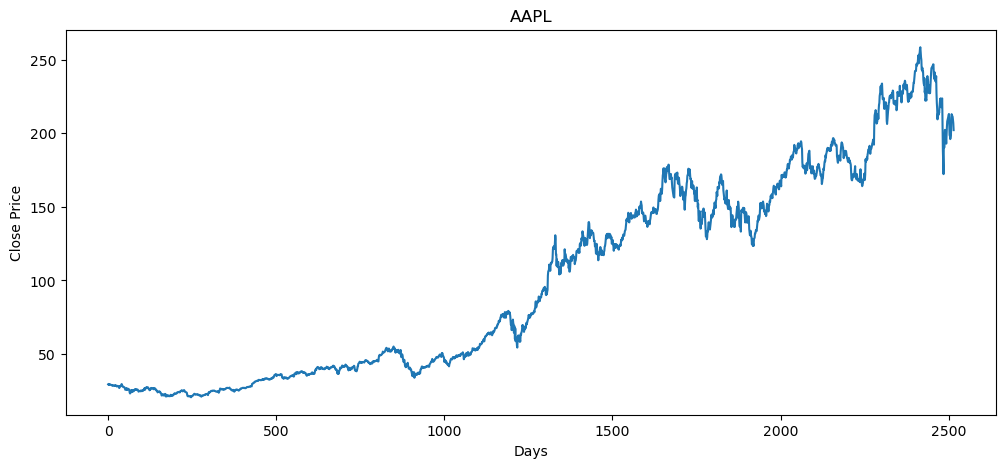

In [13]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

In [14]:
# Ejemplo de como seria la logica para calcular el promedio de movimientos.

# 10, 20, 30, 40, 50, 60, 70, 80, 90, 100

# MA(Moving Average) de 5 días: null null null null 30 40... 
temp_df = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
print(sum(temp_df[1:6])/5)

40.0


In [15]:
df1 = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,100


In [16]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


## 100 days Moving Average

In [17]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600,NaN
1,2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000,NaN
2,2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400,NaN
3,2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800,NaN
4,2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200,NaN


In [18]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600,NaN
1,2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000,NaN
2,2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400,NaN
3,2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800,NaN
4,2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200,NaN
...,...,...,...,...,...,...,...
98,2015-10-09,25.224831,25.260827,24.633130,24.747871,211064400,NaN
99,2015-10-12,25.107834,25.366562,25.071838,25.362063,121868800,26.913656
100,2015-10-13,25.150587,25.299073,24.900858,24.932356,132197200,26.870892


Text(0, 0.5, 'Price')

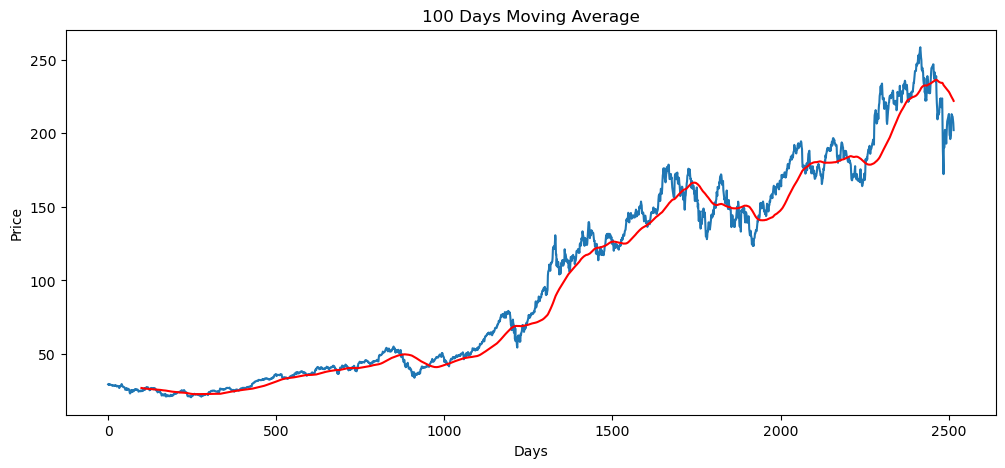

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')


## 200 days Moving Average

In [20]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600,NaN,NaN
1,2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000,NaN,NaN
2,2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400,NaN,NaN
3,2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800,NaN,NaN
4,2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-03-04,23.400745,23.568850,23.028187,23.255357,184220400,24.252172,NaN
199,2016-03-07,23.141771,23.359854,22.935046,23.259899,143315600,24.232512,25.573084
200,2016-03-08,22.950951,23.116785,22.807834,22.894158,126247600,24.210515,25.540703


Text(0, 0.5, 'Price')

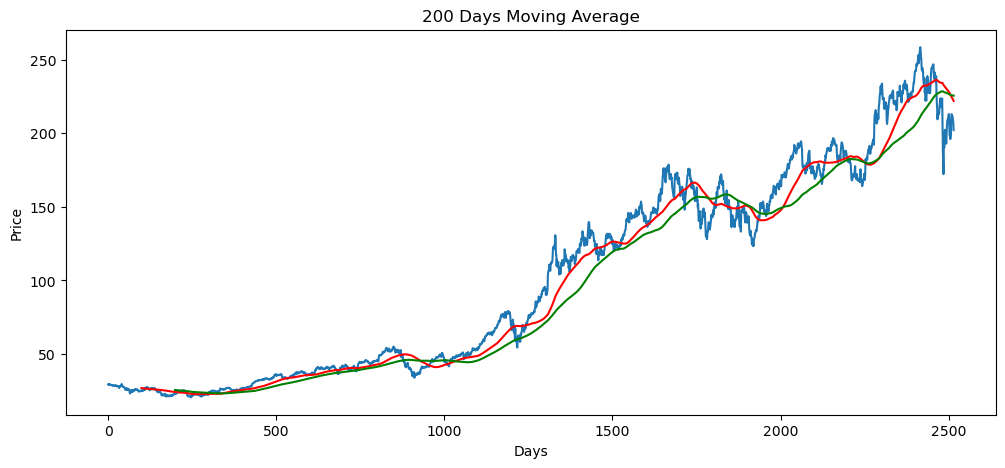

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

## Calculating % changed in each trading session

In [22]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,29.427000,NaN
1,29.684563,0.008753
2,29.030582,-0.022031
3,29.572578,0.018670
4,29.514345,-0.001969
...,...,...
2511,211.449997,-0.004145
2512,211.259995,-0.000899
2513,208.779999,-0.011739


In [23]:
df

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200,Percentage Changed
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,,
0,2015-05-21,29.427000,29.480753,29.077612,29.131366,158921600,NaN,NaN,NaN
1,2015-05-22,29.684563,29.780870,29.429241,29.474037,182384000,NaN,NaN,0.008753
2,2015-05-26,29.030582,29.767435,28.918599,29.698006,282790400,NaN,NaN,-0.022031
3,2015-05-27,29.572578,29.621851,29.126887,29.191836,183332800,NaN,NaN,0.018670
4,2015-05-28,29.514345,29.552419,29.362049,29.532263,122933200,NaN,NaN,-0.001969
...,...,...,...,...,...,...,...,...,...
2511,2025-05-15,211.449997,212.960007,209.539993,210.949997,45029500,223.790494,225.722362,-0.004145
2512,2025-05-16,211.259995,212.570007,209.770004,212.360001,54737900,223.411205,225.689755,-0.000899
2513,2025-05-19,208.779999,209.479996,204.259995,207.910004,46140500,222.960229,225.628424,-0.011739


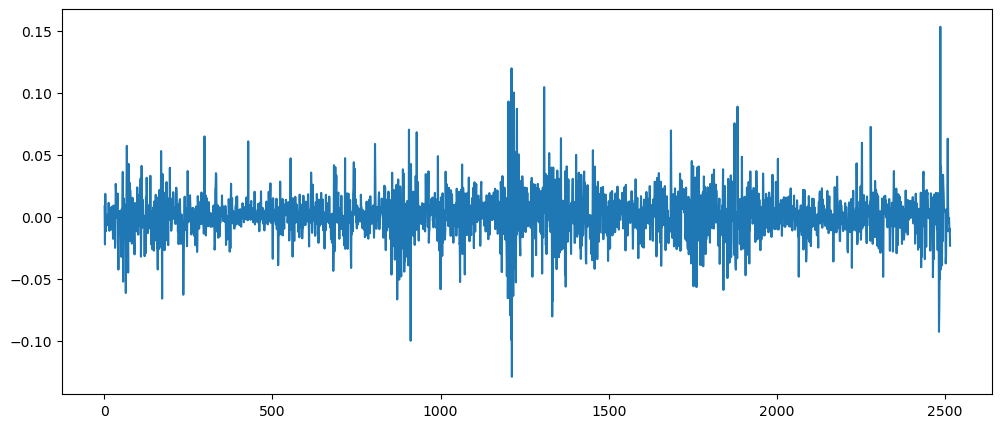

In [24]:
plt.figure(figsize=(12, 5))
plt.plot(df['Percentage Changed'])


# 4.Data Preprocessing

In [25]:
df.shape

(2516, 9)

In [26]:
# Dividiendo la data en dos partes, entrenamiento(70%) y testing(30%)

data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing = pd.DataFrame(df.Close[int(len(df)*0.7): int(len(df))])

In [27]:
data_training


Ticker,AAPL
0,29.427000
1,29.684563
2,29.030582
3,29.572578
4,29.514345
...,...
1756,144.186737
1757,140.308990
1758,144.787140
1759,143.241928


In [28]:
data_testing

Ticker,AAPL
1761,138.596466
1762,135.181229
1763,135.417465
1764,140.850266
1765,138.143723
...,...
2511,211.449997
2512,211.259995
2513,208.779999
2514,206.860001


In [29]:
type(data_training)

pandas.core.frame.DataFrame

In [30]:
# Transformando la data para crear una escala entre 0 y 1

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.05556734],
       [0.0571975 ],
       [0.05305834],
       ...,
       [0.78570305],
       [0.77592312],
       [0.79897139]], shape=(1761, 1))

In [33]:
type(data_training_array)

numpy.ndarray

In [34]:
data_training_array.shape

(1761, 1)

# 5. Sequence Creation

In [35]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
y_train

array([0.02850113, 0.02625128, 0.02860076, ..., 0.78570305, 0.77592312,
       0.79897139], shape=(1661,))

In [37]:
x_train

array([[[0.05556734],
        [0.0571975 ],
        [0.05305834],
        ...,
        [0.02524029],
        [0.02897103],
        [0.02823054]],

       [[0.0571975 ],
        [0.05305834],
        [0.05648874],
        ...,
        [0.02897103],
        [0.02823054],
        [0.02850113]],

       [[0.05305834],
        [0.05648874],
        [0.05612017],
        ...,
        [0.02823054],
        [0.02850113],
        [0.02625128]],

       ...,

       [[0.92383827],
        [0.94396591],
        [0.9604283 ],
        ...,
        [0.8317995 ],
        [0.78190299],
        [0.75736001]],

       [[0.94396591],
        [0.9604283 ],
        [0.96440393],
        ...,
        [0.78190299],
        [0.75736001],
        [0.78570305]],

       [[0.9604283 ],
        [0.96440393],
        [0.98956335],
        ...,
        [0.75736001],
        [0.78570305],
        [0.77592312]]], shape=(1661, 100, 1))

In [38]:
x_train.ndim

3

In [39]:
y_train.ndim

1

In [40]:
x_train.shape

(1661, 100, 1)

In [41]:
y_train.shape

(1661,)

In [42]:
precios = [10, 20, 30, 40, 50, 60]
x2_train = []
y2_train = []

for i in range(3, len(precios)):
    x2_train.append(precios[i-3:i])  # 3 precios anteriores
    y2_train.append(precios[i])      # el precio actual

In [43]:
x2_train

[[10, 20, 30], [20, 30, 40], [30, 40, 50]]

In [44]:
y2_train

[40, 50, 60]

In [45]:
precios[0:3]

[10, 20, 30]

# 6.Model Building

In [47]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
